In [1]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from os import path, getcwd

In [ ]:
local = f'{getcwd()}/kagglecatsanddogs.zip'
zip_ref = zipfile.ZipFile(local, 'r')
zip_ref = zip_ref.extractall(f'{getcwd()}/')
zip_ref.close()

In [2]:
print(len(os.listdir(f'{getcwd()}/PetImages/Cat/')))
print(len(os.listdir(f'{getcwd()}/PetImages/Dog/')))

12501
12501


In [12]:
try:
    os.mkdir(f'{getcwd()}/cats-v-dogs')
    os.mkdir(f'{getcwd()}/cats-v-dogs/training')
    os.mkdir(f'{getcwd()}/cats-v-dogs/testing')
    os.mkdir(f'{getcwd()}/cats-v-dogs/training/cats')
    os.mkdir(f'{getcwd()}/cats-v-dogs/training/dogs')
    os.mkdir(f'{getcwd()}/cats-v-dogs/testing/cats')
    os.mkdir(f'{getcwd()}/cats-v-dogs/testing/dogs')
except OSError:
    pass

In [13]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[-testing_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)


CAT_SOURCE_DIR = f"{getcwd()}/PetImages/Cat/"
TRAINING_CATS_DIR = f"{getcwd()}/cats-v-dogs/training/cats/"
TESTING_CATS_DIR = f"{getcwd()}/cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = f"{getcwd()}/PetImages/Dog/"
TRAINING_DOGS_DIR = f"{getcwd()}/cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = f"{getcwd()}/cats-v-dogs/testing/dogs/"

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

666.jpg is zero length, so ignoring.
11702.jpg is zero length, so ignoring.


In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
TRAINING_DIR = f"{getcwd()}/cats-v-dogs/training/"
train_datagen = ImageDataGenerator(rescale=1.0/255.)
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=100,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

VALIDATION_DIR = f"{getcwd()}/cats-v-dogs/testing/"
validation_datagen = ImageDataGenerator(rescale=1.0/255.)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=100,
                                                              class_mode='binary',
                                                              target_size=(150, 150))

# Expected Output:
# Found 22498 images belonging to 2 classes.
# Found 2500 images belonging to 2 classes.

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [15]:
# Note that this may take some time.
history = model.fit(train_generator,
                              epochs=50,
                              verbose=1,
                              validation_data=validation_generator)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 225 steps, validate for 25 steps
Epoch 1/50
 93/225 [===========>..................] - ETA: 1:57 - loss: 0.8820 - accuracy: 0.5692

F:\DO_NOT_TOUCH\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
F:\DO_NOT_TOUCH\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
F:\DO_NOT_TOUCH\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
F:\DO_NOT_TOUCH\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
F:\DO_NOT_TOUCH\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting

225/225 [==============================] - 206s 917ms/step - loss: 0.7099 - accuracy: 0.6396 - val_loss: 0.5137 - val_accuracy: 0.7664
Epoch 2/50
225/225 [==============================] - 203s 902ms/step - loss: 0.4950 - accuracy: 0.7589 - val_loss: 0.4412 - val_accuracy: 0.7984
Epoch 3/50
225/225 [==============================] - 203s 902ms/step - loss: 0.4321 - accuracy: 0.8014 - val_loss: 0.4213 - val_accuracy: 0.8028
Epoch 4/50
225/225 [==============================] - 202s 896ms/step - loss: 0.3774 - accuracy: 0.8315 - val_loss: 0.4748 - val_accuracy: 0.7684
Epoch 5/50
225/225 [==============================] - 202s 900ms/step - loss: 0.3208 - accuracy: 0.8607 - val_loss: 0.4511 - val_accuracy: 0.7888
Epoch 6/50
225/225 [==============================] - 203s 901ms/step - loss: 0.2567 - accuracy: 0.8944 - val_loss: 0.4090 - val_accuracy: 0.8228
Epoch 7/50
225/225 [==============================] - 203s 903ms/step - loss: 0.1860 - accuracy: 0.9258 - val_loss: 0.4833 - val_accura

<Figure size 432x288 with 0 Axes>

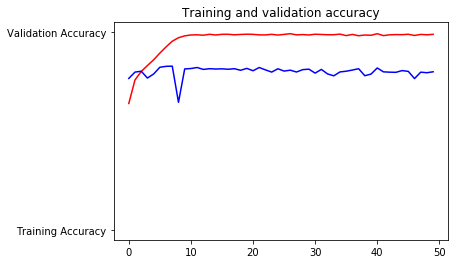

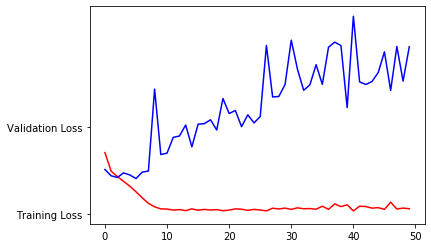

<Figure size 432x288 with 0 Axes>

In [16]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()


# Desired output. Charts with training and validation metrics. No crash :)

In [18]:
import numpy as np
from keras.preprocessing import image

fn = 'Dog.jpg'
path = f'{getcwd()}/Test_Images/' + fn
img = image.load_img(path, target_size=(150, 150))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

classes = model.predict(images, batch_size=10)

print(classes[0])

if classes[0] > 0:
    print(fn + " is a dog")
else:
    print(fn + " is a cat")

[1.]
Dog.jpg is a dog
